<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

## Step 1: Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import pyplot 

## Step 2: Loading Dataset

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

## Step 3: Having a look at the dataset

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Step 4: Shape of the dataset

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

## Step 5: Plotting a sample data

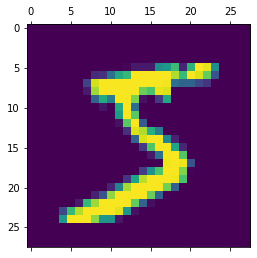

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

## Step 6: Using tensorflow for classification

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
model1 = Sequential()
model1.add(Conv2D(32, (3,3), activation = 'relu',input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3,3), activation = 'relu'))

In [14]:
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [15]:
x_testabc = X_test
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [16]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train,y_train, epochs=5)
test_loss, test_acc = model1.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 1.5691 - accuracy: 0.4186
Epoch 2/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2783 - accuracy: 0.9135
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1741 - accuracy: 0.9466
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1300 - accuracy: 0.9604
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0839 - accuracy: 0.9736


In [17]:
tensor = model1.evaluate(x_test, y_test)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0839 - accuracy: 0.9736


The predicted value: 3
3


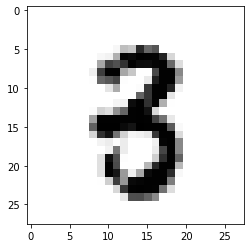

In [18]:
image_index = 2853
pyplot.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model1.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('The predicted value:', pred.argmax())
print(pred.argmax())

## Step 7: Using ANN for classification

In [19]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4646 - accuracy: 0.8687
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1345 - accuracy: 0.9603
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0875 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0642 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0487 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0365 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0316 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.017

In [20]:
ann = model2.evaluate(X_test,y_test)[1]
ann

313/313 [==============================] - 0s 848us/step - loss: 0.0854 - accuracy: 0.9764


0.9764000177383423

In [21]:
X_trains = X_train.reshape(-1,28,28,1)
X_trains.shape

(60000, 28, 28, 1)

In [22]:
X_tests = X_test.reshape(-1,28,28,1)
X_tests.shape

(10000, 28, 28, 1)

In [23]:
X_trains = X_trains / 255
X_tests = X_tests / 255

## Step 8: Using CNN for classification

In [24]:
#Using CNN for classification
model3 = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [25]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X_trains, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 1.3399 - accuracy: 0.5855
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3288 - accuracy: 0.9025
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2739 - accuracy: 0.9177
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2378 - accuracy: 0.9282
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2026 - accuracy: 0.9403


In [26]:
cnn = model3.evaluate(X_tests,y_test)[1]
cnn

313/313 [==============================] - 1s 3ms/step - loss: 0.1748 - accuracy: 0.9485


0.9484999775886536

## Step 9: Making predictions on test set

In [27]:
#y_train[:5]
y_pred = model2.predict(X_test_flattened)
#y_pred[0]

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
#y_predicted_labels
y_predicted_labels[:40]

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1]

## Step 10: Confirming that the predicted value is same as the test value through a sample

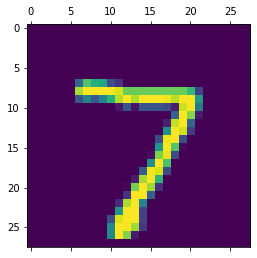

In [29]:
plt.matshow(X_test[0])
#x_testabc[0]

In [30]:
np.argmax(y_pred[0])

7

## Step 11: Visualizing the score

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    2,    0,    1,    4,    2,    3,    0],
       [   0, 1117,    3,    2,    0,    0,    3,    1,    9,    0],
       [   5,    1, 1004,    4,    3,    0,    4,    6,    4,    1],
       [   0,    0,    4,  991,    0,    2,    0,    4,    1,    8],
       [   1,    0,    5,    1,  960,    0,    3,    2,    1,    9],
       [   1,    0,    0,   18,    1,  859,    6,    0,    2,    5],
       [   1,    2,    0,    1,    4,    2,  945,    0,    3,    0],
       [   0,    4,    9,    4,    0,    0,    0, 1002,    1,    8],
       [   4,    0,    4,   11,    3,    5,    4,    2,  935,    6],
       [   3,    2,    0,    6,    7,    2,    0,    6,    0,  983]])>

Text(69.0, 0.5, 'Truth')

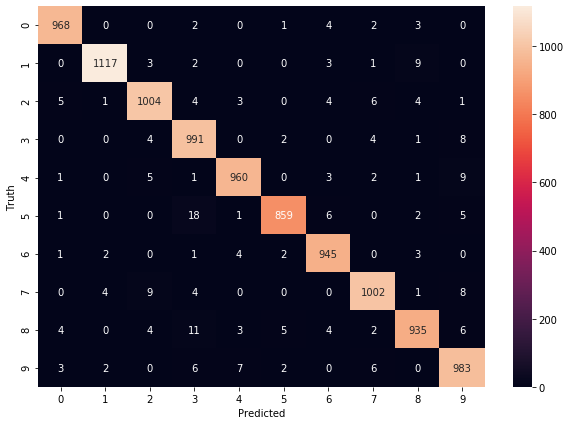

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
print("1. Tensorflow                           : ",ann*100)
print("2. Artificial Neural Network (ANN)      : ",tensor*100)
print("3. Convolutional Neural Network (CNN)   : ",cnn*100)

1. Tensorflow                           :  97.64000177383423
2. Artificial Neural Network (ANN)      :  97.35999703407288
3. Convolutional Neural Network (CNN)   :  94.84999775886536


In [34]:
import sklearn.metrics as metrics

print('Confusion matrix \n')
print(metrics.confusion_matrix(y_test,y_predicted_labels))
print('*'*80)
print('\n')
print('Classification report \n')
print(metrics.classification_report(y_test,y_predicted_labels))

Confusion matrix 

[[ 968    0    0    2    0    1    4    2    3    0]
 [   0 1117    3    2    0    0    3    1    9    0]
 [   5    1 1004    4    3    0    4    6    4    1]
 [   0    0    4  991    0    2    0    4    1    8]
 [   1    0    5    1  960    0    3    2    1    9]
 [   1    0    0   18    1  859    6    0    2    5]
 [   1    2    0    1    4    2  945    0    3    0]
 [   0    4    9    4    0    0    0 1002    1    8]
 [   4    0    4   11    3    5    4    2  935    6]
 [   3    2    0    6    7    2    0    6    0  983]]
********************************************************************************


Classification report 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5      

# End